# 1. Image Read, Write, Show

Success: Image is loaded
Image is successfully saved


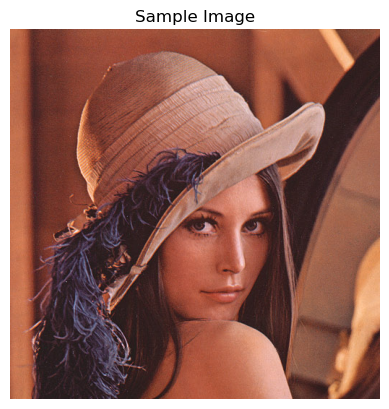

In [24]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

os.makedirs("outputImages", exist_ok=True)

img = cv2.imread("Images/lena_color.jpg")
x = img

if img is None:
    print("Error: Could not read the image")
else:
    print("Success: Image is loaded")

    success = cv2.imwrite("outputImages/lena_copty.jpg", img)
    if success:
        print("Image is successfully saved")
    else:
        print("Could not save")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title("Sample Image")
    plt.axis("off")
    plt.show()



# 2.Image Properties

In [26]:
print("Original Dimention: ", img.shape)
height, width, channels = img.shape
size = img.size

print("Height: ", height)
print("Width", width)
print("No. of Channles:", channels)
print("Sige = Height * Width * Channel = ", size)

Original Dimention:  (512, 512, 3)
Height:  512
Width 512
No. of Channles: 3
Sige = Height * Width * Channel =  786432


# 3. Display the individual channels (R, G, B) pixel values in the image

In [27]:
img = img_rgb
print(img)

[[[193 111  74]
  [198 116  79]
  [195 113  76]
  ...
  [146  78  55]
  [146  78  55]
  [146  78  55]]

 [[196 114  77]
  [197 115  78]
  [194 112  75]
  ...
  [148  80  57]
  [148  80  57]
  [148  80  57]]

 [[199 115  78]
  [192 107  76]
  [200 117  77]
  ...
  [150  80  54]
  [147  80  54]
  [145  79  55]]

 ...

 [[168  88  61]
  [170  90  63]
  [174  95  65]
  ...
  [ 69  39  37]
  [ 69  38  36]
  [ 71  40  38]]

 [[166  86  61]
  [169  89  62]
  [171  91  64]
  ...
  [ 68  38  36]
  [ 68  38  36]
  [ 71  41  39]]

 [[158  81  55]
  [165  88  62]
  [167  90  62]
  ...
  [ 67  39  36]
  [ 71  41  39]
  [ 76  46  44]]]


# 4. Separate image in R, G, B color channels:

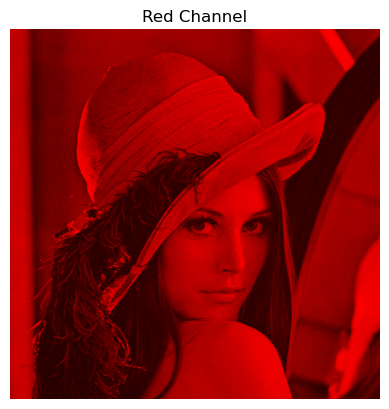

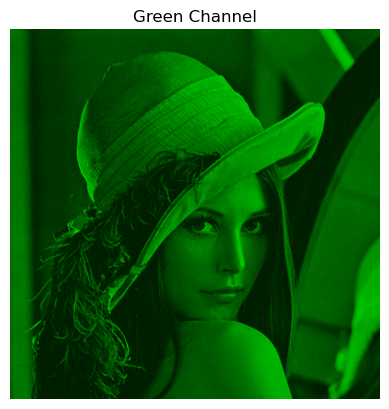

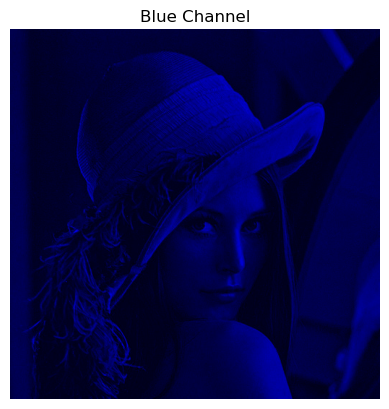

In [20]:
R, G, B = cv2.split(img)
K = np.zeros_like(B)

B = cv2.merge([K, K, B])
G = cv2.merge([K, G, K])
R = cv2.merge([R, K, K])

plt.imshow(R)
plt.title("Red Channel")
plt.axis("off")
plt.show()

plt.imshow(G)
plt.title("Green Channel")
plt.axis("off")
plt.show()

plt.imshow(B)
plt.title("Blue Channel")
plt.axis("off")
plt.show()

# 5. Convert the image into a gray scale image

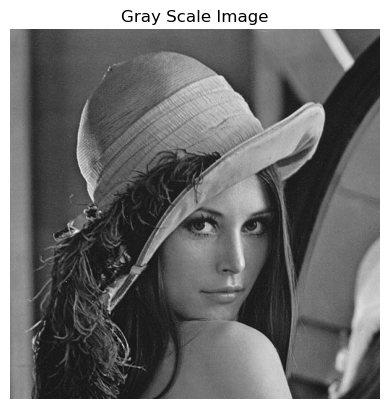

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Gray Scale Image")
plt.axis("off")
plt.show()



# 6. Image Cropping

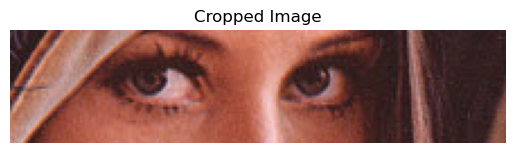

In [ ]:
# cropped = img[y1:y2, x1:x2]

cropped = img[250:300, 200:420]
plt.imshow(cropped)
plt.title("Cropped Image")
plt.axis("off")
plt.show()


# 7. Image Flipping

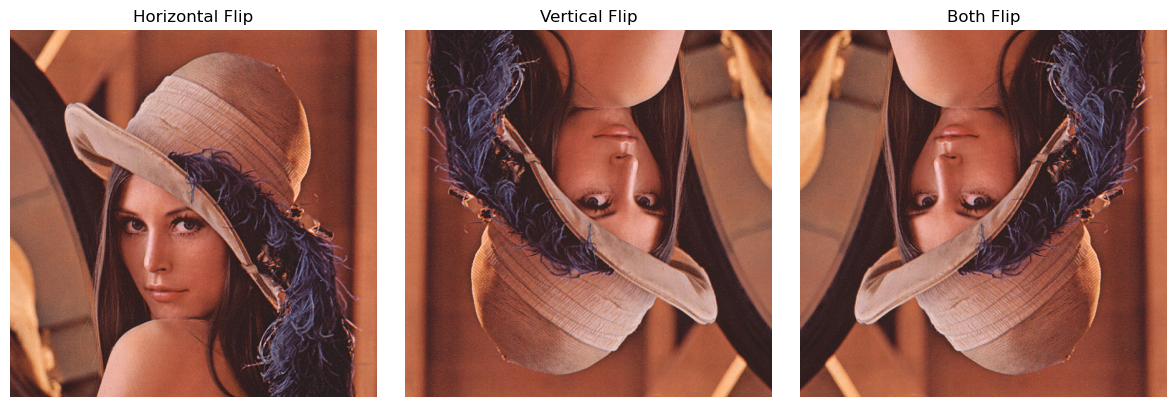

In [ ]:
horizontal_flip = cv2.flip(img, 1) # left-right
vertical_flip = cv2.flip(img, 0) # up-down
both_flip = cv2.flip(img, -1) # both axes

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(horizontal_flip)
plt.title("Horizontal Flip")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(vertical_flip)
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(both_flip)
plt.title("Both Flip")
plt.axis("off")

plt.tight_layout()
plt.show()



# 8. Image Resize

Original Dimention:  (512, 512, 3)
Resized Dimention:  (300, 200, 3)


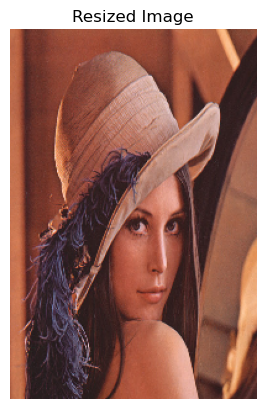

In [54]:
print("Original Dimention: ", img.shape)

resized_img = cv2.resize(img, (200, 300)) # (width, height)
print("Resized Dimention: ", resized_img.shape)

plt.imshow(resized_img)
plt.title("Resized Image")
plt.axis("off")
plt.show()

# 9. Image Ratating

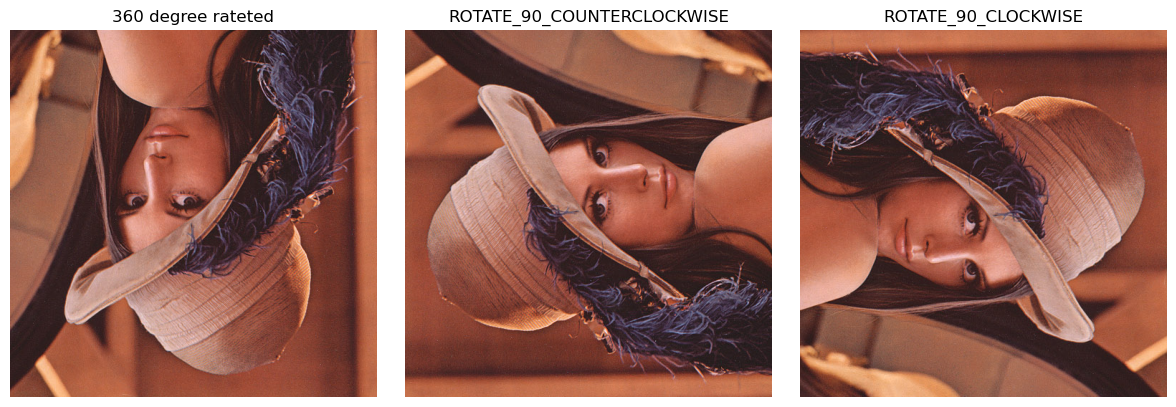

In [56]:
output1 = cv2.flip(img, -1)
output2 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
output3 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(output1)
plt.title("360 degree rateted")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(output2)
plt.title("ROTATE_90_COUNTERCLOCKWISE")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output3)
plt.title("ROTATE_90_CLOCKWISE")
plt.axis("off")

plt.tight_layout()
plt.show()

# 10. Image Draw

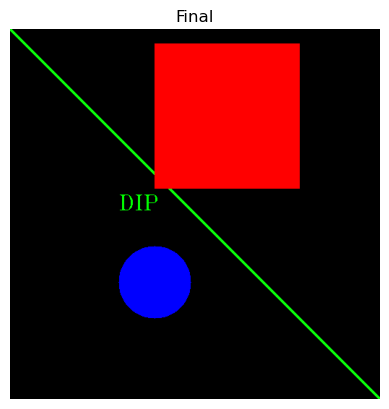

In [61]:
# create a 512X512 black image (3 channel)
blank_img = np.zeros((512,512,3), dtype=np.uint8)

# draw a green diagonal line from top-left to bottom-right
cv2.line(blank_img, (0,0), (512,512), (10,255,10), 2)    # (x, y)

# draw a rectangle
cv2.rectangle(blank_img, (200,20), (400,220), (255,0,0), -1) # (x, y)

# draw a circle
cv2.circle(blank_img, (200,350), 50, (0,0,255), -1)

#add text
cv2.putText(
    img = blank_img,
    text = 'DIP',
    org = (150,250),
    fontFace = cv2.FONT_HERSHEY_TRIPLEX,
    fontScale = 1,
    color = (0, 255, 0),
    thickness = 1
)


plt.imshow(blank_img)
plt.title("Final")
plt.axis("off")
plt.show()

# 11. Spatial Resolution Reduction & Color Quantization

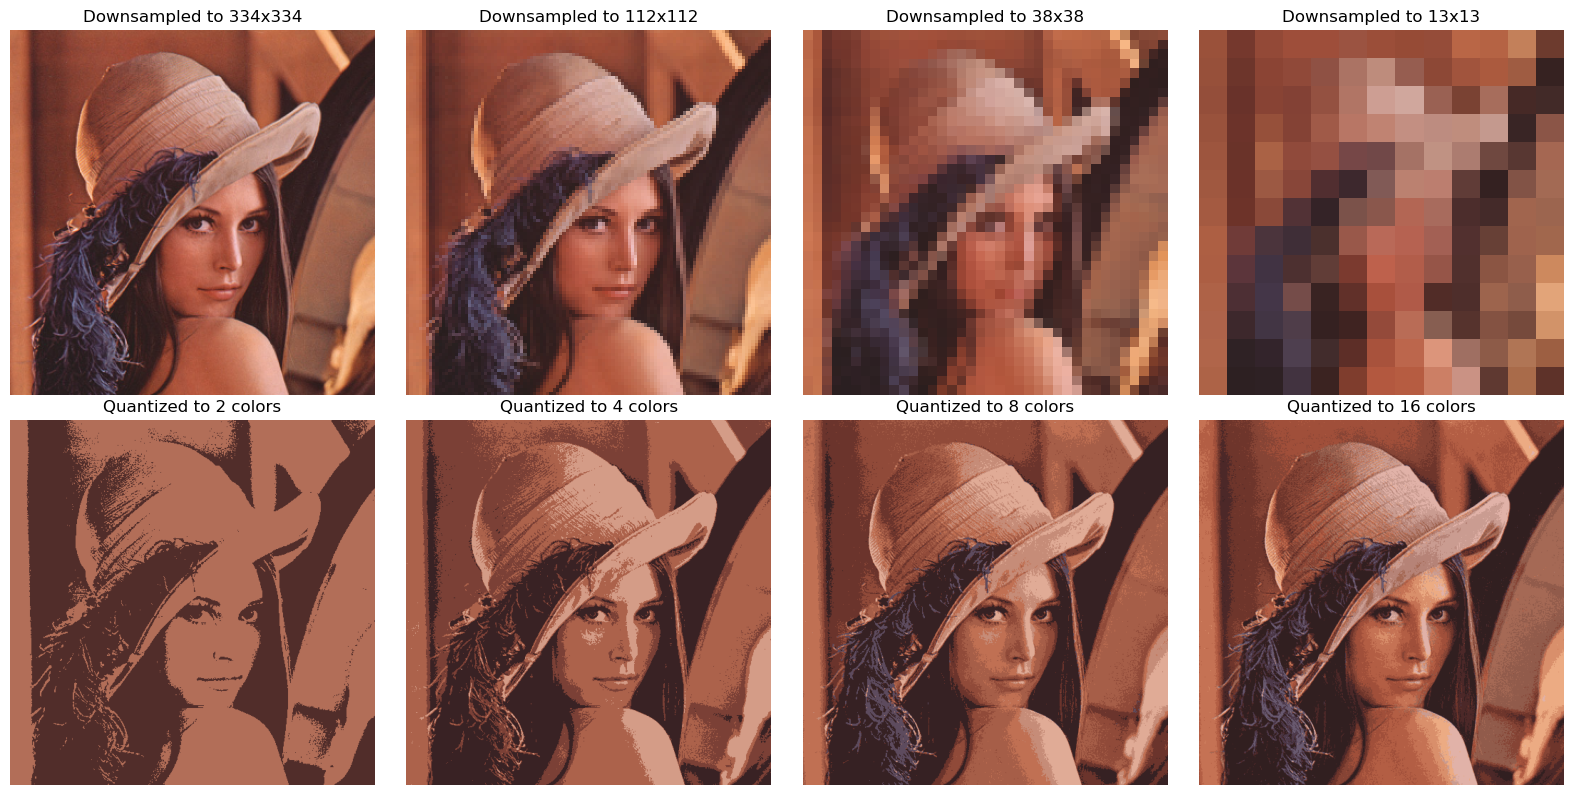

In [66]:
# Spatial Resolution Reduction (Downsampling)

# target size of downsampling
n_values = [334, 112, 38, 13]
downsampled_images = []

for n in n_values:
    # resize
    resized_img = cv2.resize(img, (n, n), interpolation = cv2.INTER_AREA)
    downsampled_images.append(resized_img)


# Color resolution reduction (K-Means Quantization)
k_values = [2, 4, 8, 16]
quantized_images = []

# preprocess
pixel_vals = img.reshape(-1, 3)
pixel_vals = np.float32(pixel_vals)

for k in k_values:
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    ret, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)

    segmented_data = centers[labels.flatten()]
    quantized_image = segmented_data.reshape((img.shape))
    quantized_images.append(quantized_image)





fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, d_img in enumerate(downsampled_images):
    axes[0, i].imshow(d_img)
    axes[0, i].set_title(f'Downsampled to {n_values[i]}x{n_values[i]}')
    axes[0, i].axis('off')
for i, q_img in enumerate(quantized_images):
    axes[1, i].imshow(q_img)
    axes[1, i].set_title(f'Quantized to {k_values[i]} colors')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()